## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 16})

## Extracting data from csv files

In [2]:
DATA_PATH = os.getcwd()+ '/data/'
IMAGES_PATH = os.getcwd()+ '/images/'
CRASH_REWARD = -1000
AWAY_REWARD = -500
BEST_REWARD = 1000
AVERAGE_EPISODE_COUNT = 40

evaluations_dict = {
    'evaluation_1': '              Evaluation of agent from Experiment 1',
    'evaluation_2': '              Evaluation of agent from Experiment 2',
    'evaluation_3': '              Evaluation of agent from Experiment 3',
    'evaluation_4': '              Evaluation of agent from Experiment 4'
}

In [3]:
def get_data(evaluation_name):
    
    df = pd.read_csv(DATA_PATH +  evaluation_name + '/episodic_rewards.csv')
    episodic_rewards = df.to_numpy().reshape((len(df),))
    avg_episodic_rewards = get_average(episodic_rewards)
    
    data_dict = {
        'episodic_rewards' : episodic_rewards,
        'average_episodic_rewards' : avg_episodic_rewards
    }
    
    return data_dict

In [4]:
def get_average(episodic_rewards_arr):
    
    average_episodic_rewards = []
    episode_reward_list = []

    for episodic_reward in episodic_rewards_arr:
        episode_reward_list.append(episodic_reward)
        average_episodic_rewards.append(np.mean(episode_reward_list[-AVERAGE_EPISODE_COUNT:]))

    average_episodic_rewards = np.array(average_episodic_rewards).reshape((len(average_episodic_rewards),))
    
    return average_episodic_rewards

## Plotting results

In [5]:
def plot_results(evaluation_name, plot_title, data_dict):

    episodic_rewards = data_dict['episodic_rewards']
    average_episodic_rewards = data_dict['average_episodic_rewards']
    
    # -------------------------- PLOTTING REWARDS OVER EPISODES OF EVALUATION -----------------------------
    
    fig = plt.figure(figsize=(14,10), dpi=120)

    plt.plot(np.arange(1,episodic_rewards.shape[0]+1), episodic_rewards, color='orange', linewidth=1.0, label='episodic')
    plt.plot(np.arange(1,average_episodic_rewards.shape[0]+1), average_episodic_rewards, color='darkgreen', linewidth=2, label='average episodic') 
    plt.axhline(BEST_REWARD, color='green', label='best reward')
    plt.axhline(CRASH_REWARD, color='darkred', label='crash reward')
    plt.axhline(AWAY_REWARD, color='red', label='away reward')
    plt.grid()
    plt.xlabel('Episode', fontsize=16)
    plt.ylabel('$r_t$', fontsize=16)
    plt.title('Episodic and Average Episodic Reward \n(averaged every {} episodes)'.format(AVERAGE_EPISODE_COUNT), fontsize=16)
    plt.legend(loc='lower left')

    plt.suptitle(plot_title, fontsize=18)
    plt.tight_layout()
    plt.show()

    fig.savefig(IMAGES_PATH + evaluation_name, facecolor = 'white', bbox_inches='tight')

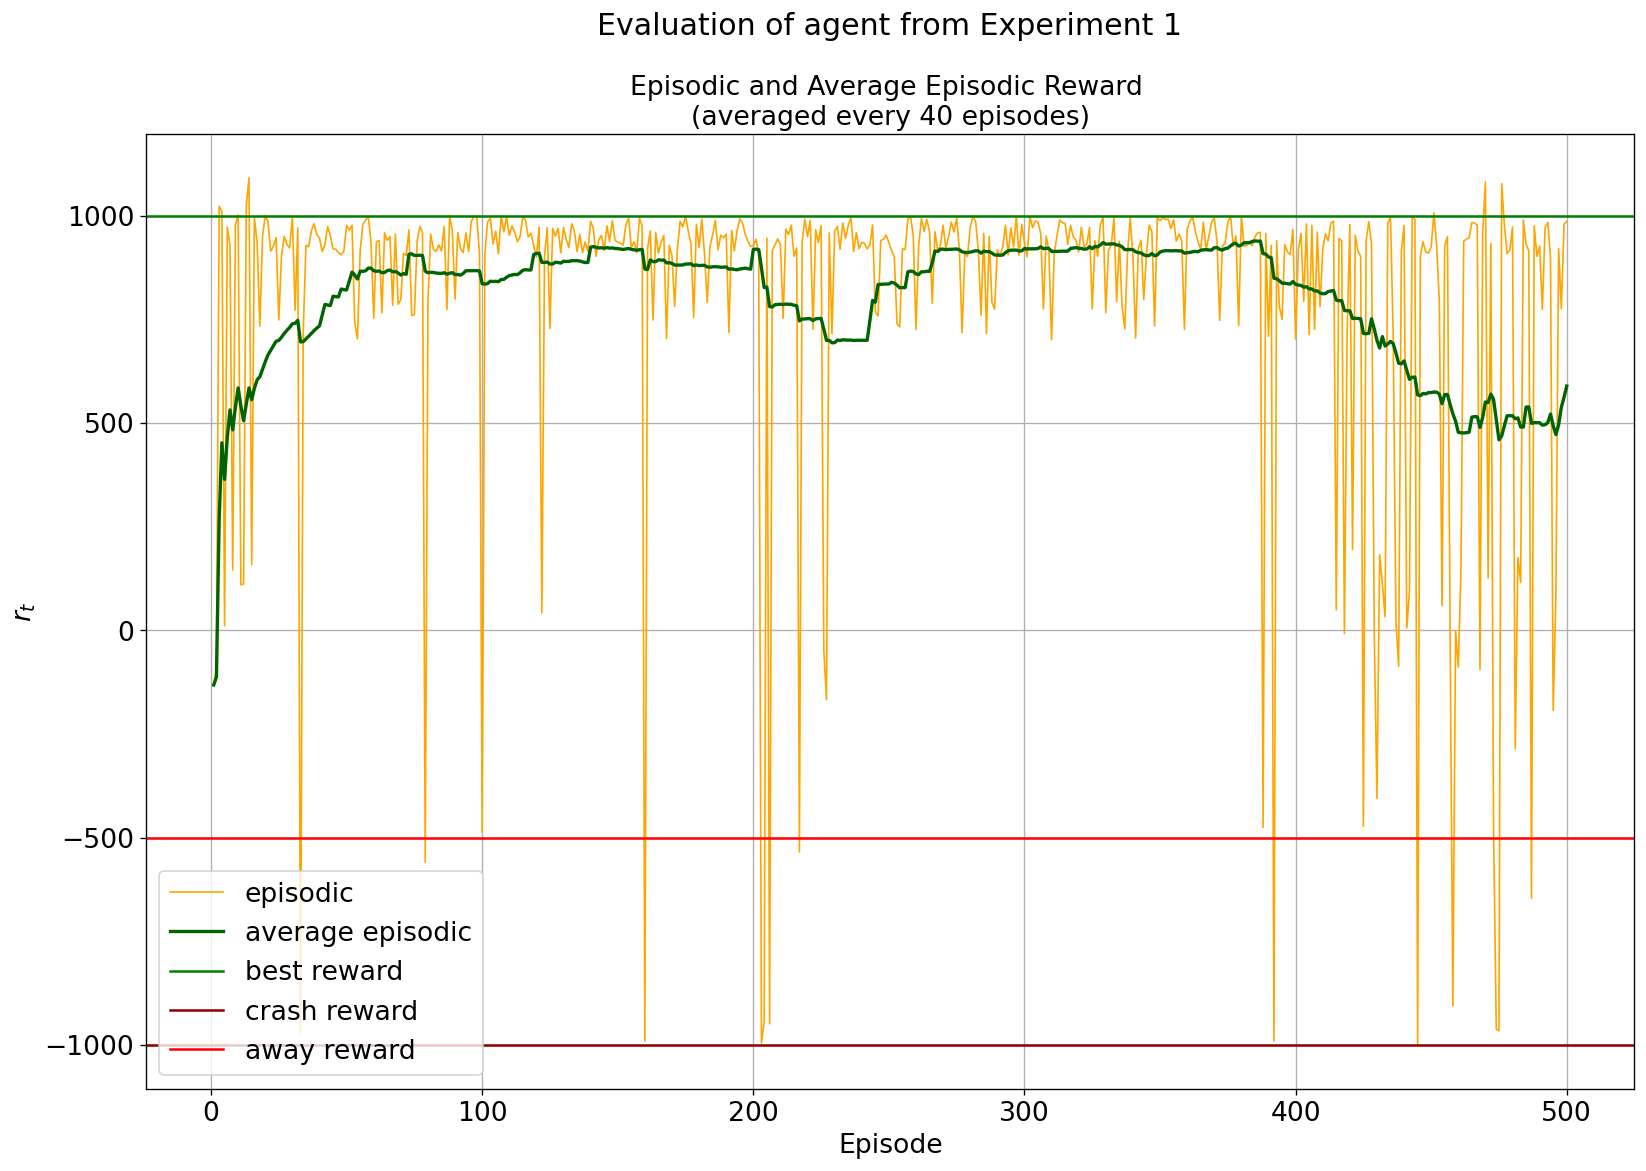

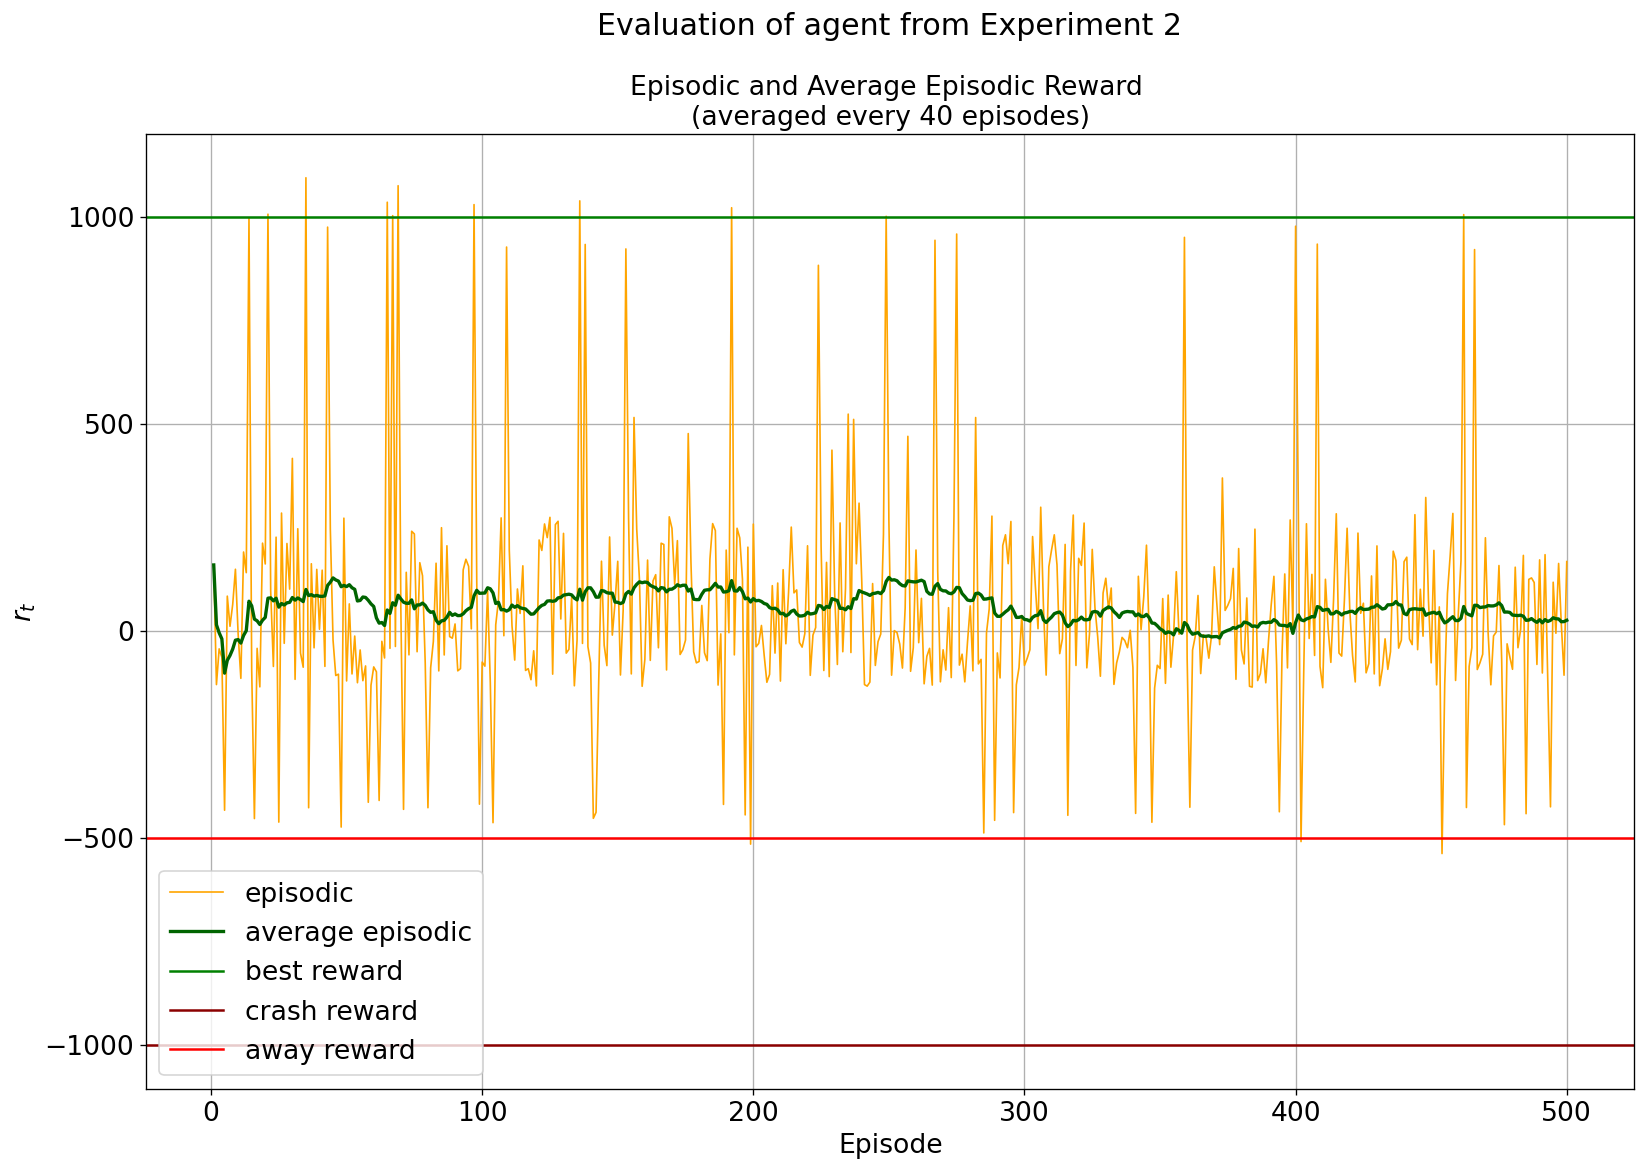

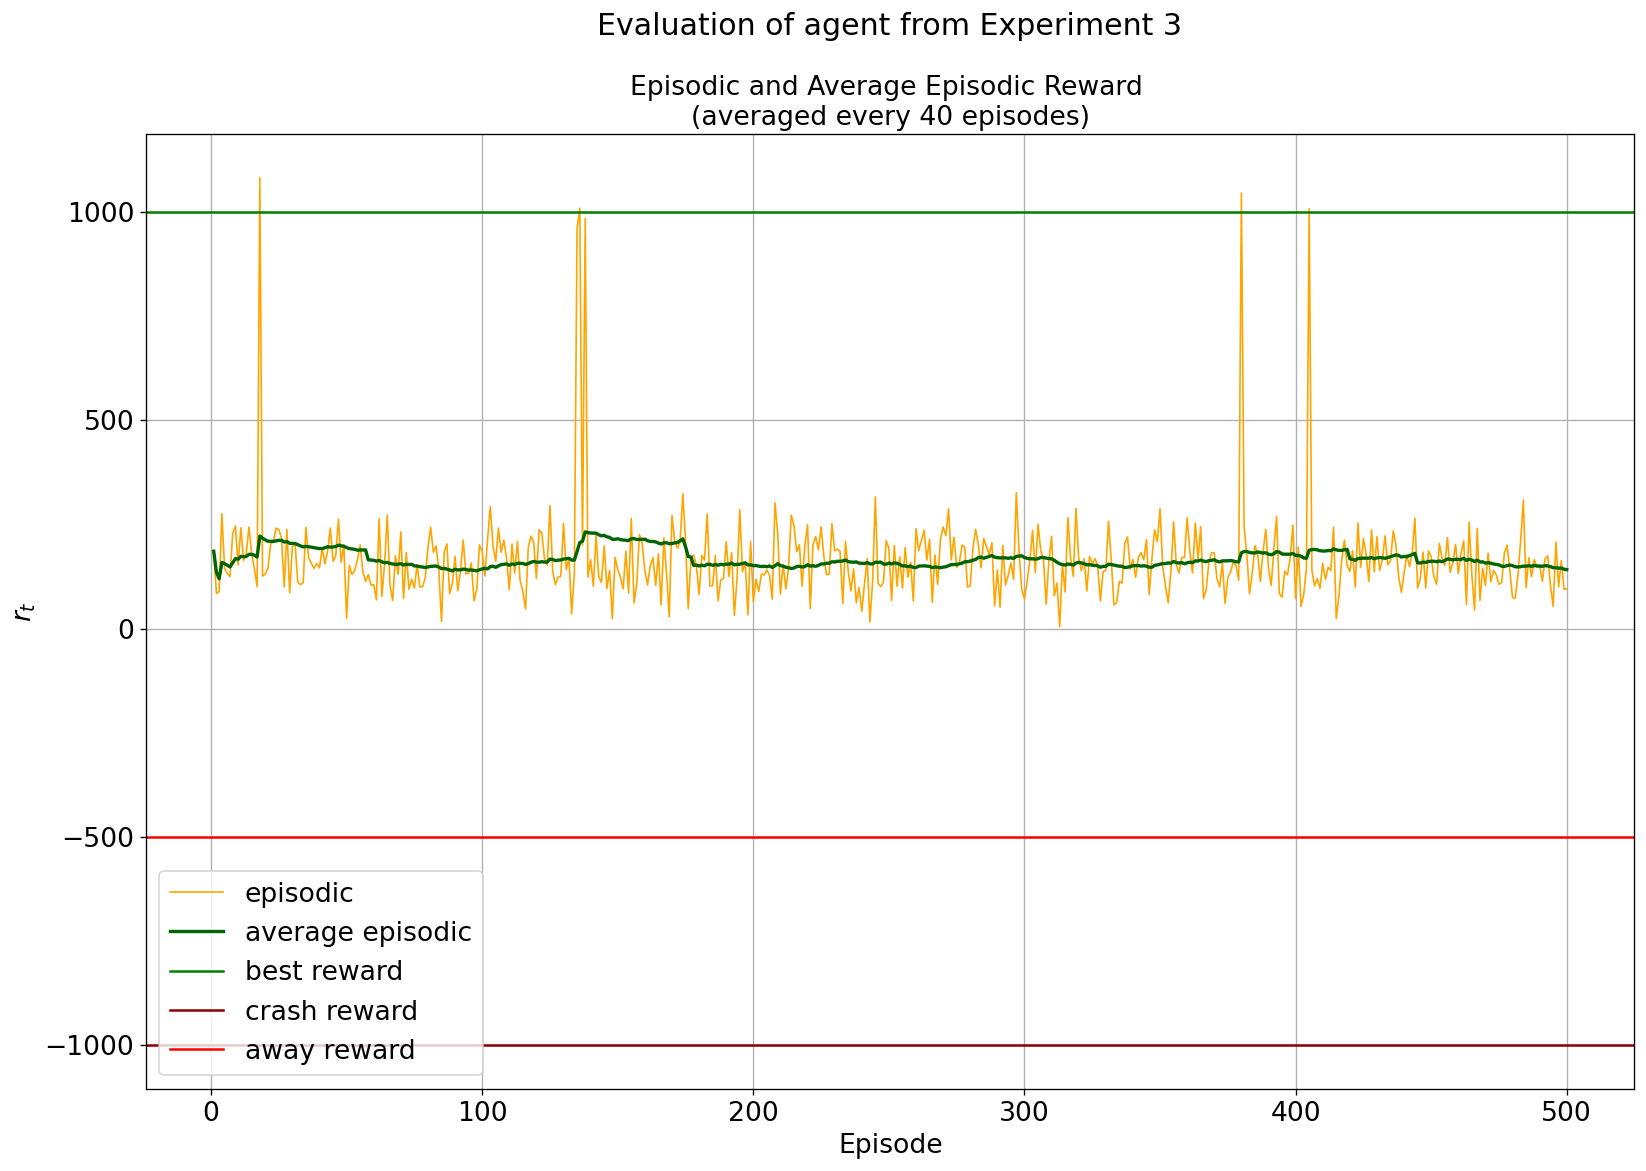

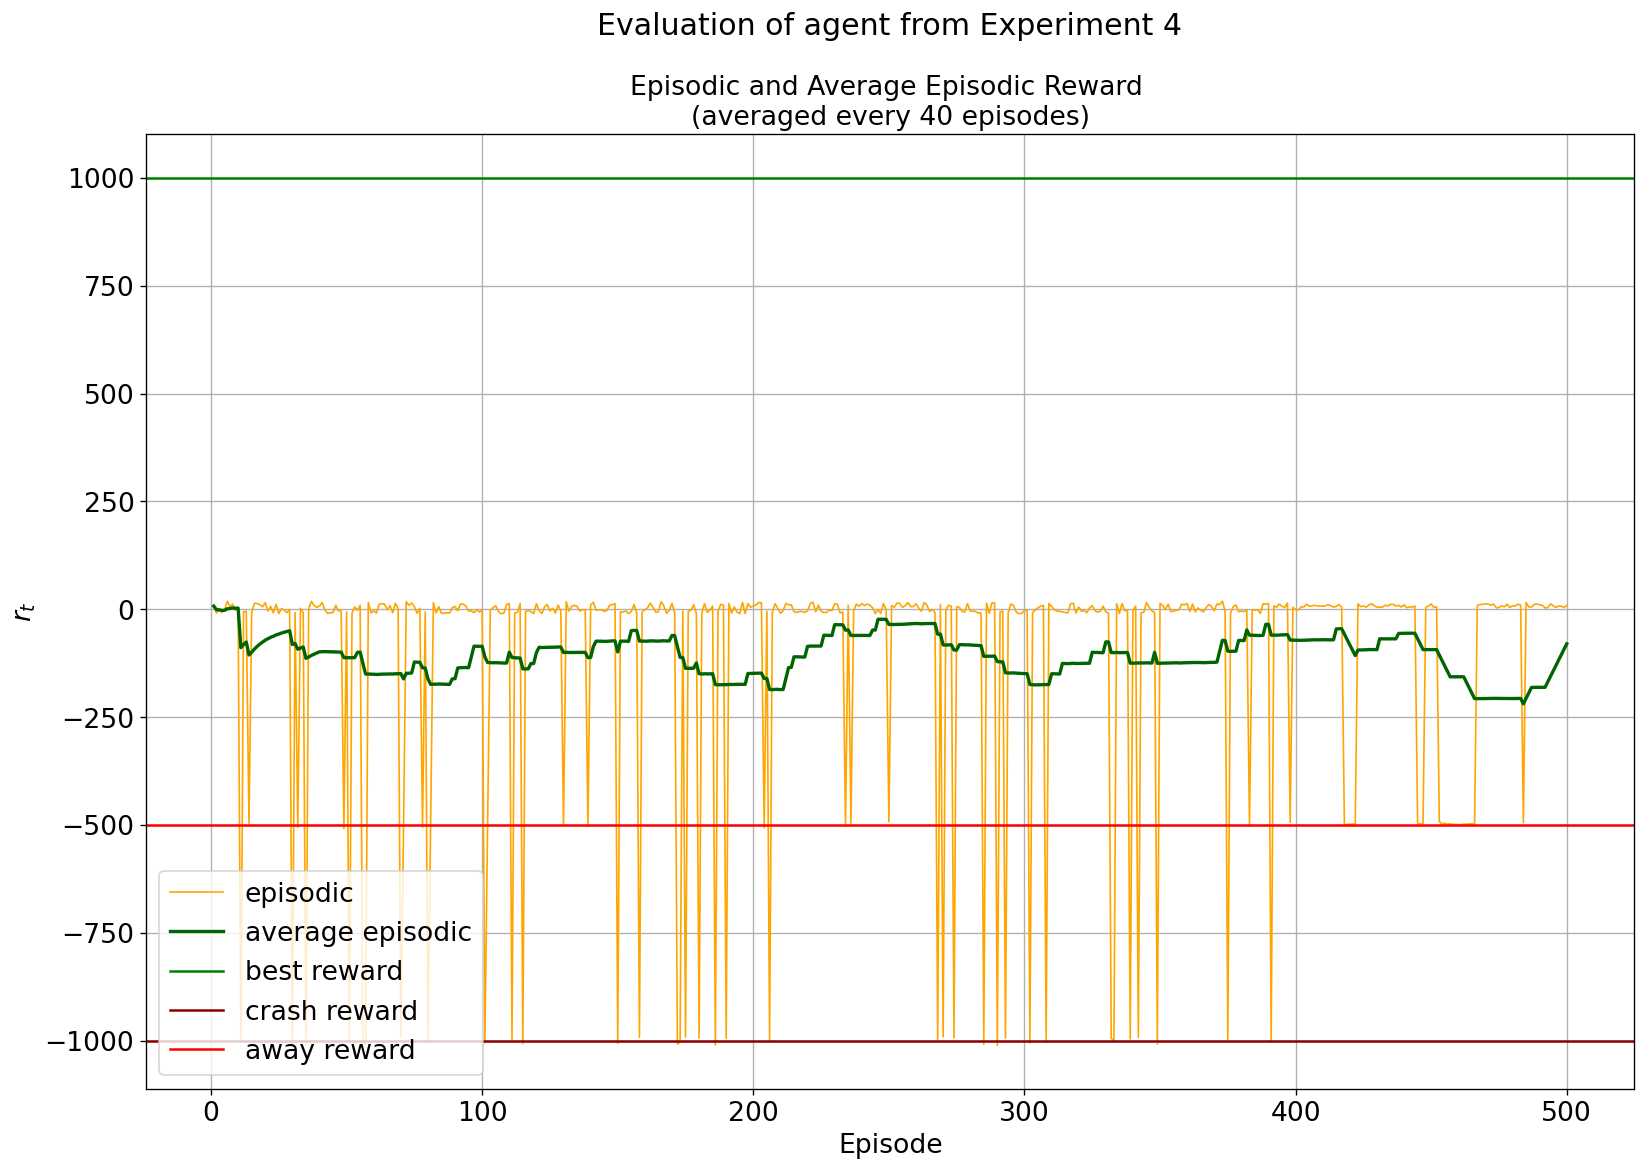

In [6]:
for key in evaluations_dict.keys():
    data_dict = get_data(key)
    plot_results(key, evaluations_dict[key], data_dict)